In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
class DVBS2X:
    def __init__(self, num_symbols, samples_per_symbol, carrier_freq):
        self.num_symbols = num_symbols
        self.samples_per_symbol = samples_per_symbol
        self.carrier_freq = carrier_freq

    def generate_bpsk(self):
        bits = np.random.randint(0, 2, self.num_symbols)
        symbols = 2 * bits - 1  # Map 0 to -1 and 1 to 1
        return self.modulate(symbols), symbols, bits

    def generate_qpsk(self):
        bits = np.random.randint(0, 2, 2 * self.num_symbols)
        qpsk_map = {
            (0, 0): 1 + 1j, (0, 1): -1 + 1j,
            (1, 1): -1 - 1j, (1, 0): 1 - 1j
        }
        symbols = np.array([qpsk_map[tuple(bits[i:i+2])] for i in range(0, len(bits), 2)])
        return self.modulate(symbols), symbols, bits

    def generate_8apsk(self):
        return self._generate_apsk(8, 3, [1, 2.6], [1, 7])

    def generate_16apsk(self):
        return self._generate_apsk(16, 4, [1, 2.6], [4, 12])

    def generate_32apsk(self):
        return self._generate_apsk(32, 5, [1, 2.6, 4.15], [4, 12, 16])

    def generate_64apsk(self):
        return self._generate_apsk(64, 6, [1, 1.6, 2.4, 3.5], [4, 12, 20, 28])

    def generate_128apsk(self):
        return self._generate_apsk(128, 7, [1, 1.5, 2.2, 3.0, 3.8], [4, 12, 20, 40, 52])

    def generate_256apsk(self):
        return self._generate_apsk(256, 8, [1, 1.4, 1.9, 2.5, 3.2, 4.0], [4, 12, 20, 28, 60, 132])

    def _generate_apsk(self, m, bits_per_symbol, radii, points_per_ring):
        bits = np.random.randint(0, 2, bits_per_symbol * self.num_symbols)
        
        constellation = []
        for r, n in zip(radii, points_per_ring):
            for k in range(n):
                angle = 2 * np.pi * k / n
                constellation.append(r * np.exp(1j * angle))
        constellation = np.array(constellation)
        
        constellation /= np.sqrt(np.mean(np.abs(constellation)**2))
        
        symbols = np.zeros(self.num_symbols, dtype=complex)
        for i in range(self.num_symbols):
            bit_chunk = bits[i*bits_per_symbol:(i+1)*bits_per_symbol]
            symbol_index = int(''.join(map(str, bit_chunk)), 2)
            symbols[i] = constellation[symbol_index]
        
        return self.modulate(symbols), symbols, bits

    def modulate(self, symbols):
        t = np.arange(self.num_symbols * self.samples_per_symbol) / (self.carrier_freq * self.samples_per_symbol)
        upsampled = np.repeat(symbols, self.samples_per_symbol)
        carrier = np.exp(2j * np.pi * self.carrier_freq * t)
        signal = np.real(upsampled * carrier)
        return t, signal

    def plot_signal(self, t, signal, modulation_type, num_symbols_to_plot=10):
        samples_to_plot = num_symbols_to_plot * self.samples_per_symbol
        plt.figure(figsize=(12, 6))
        plt.plot(t[:samples_to_plot], signal[:samples_to_plot])
        plt.title(f'{modulation_type} Modulated Signal (Zoomed-in on {num_symbols_to_plot} symbols)')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()
    
    def plot_constellation(self, symbols, modulation_type):
        plt.figure(figsize=(8, 8))
        plt.scatter(symbols.real, symbols.imag, c='r', alpha=0.5)
        plt.title(f'{modulation_type} Constellation Diagram')
        plt.xlabel('In-phase')
        plt.ylabel('Quadrature')
        plt.grid(True)
        plt.axis('equal')
        plt.show()

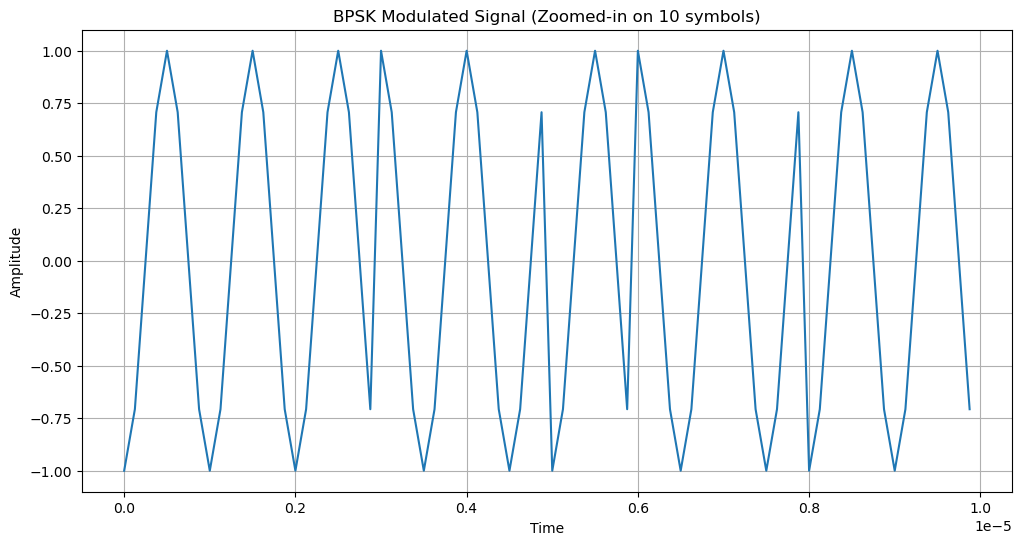

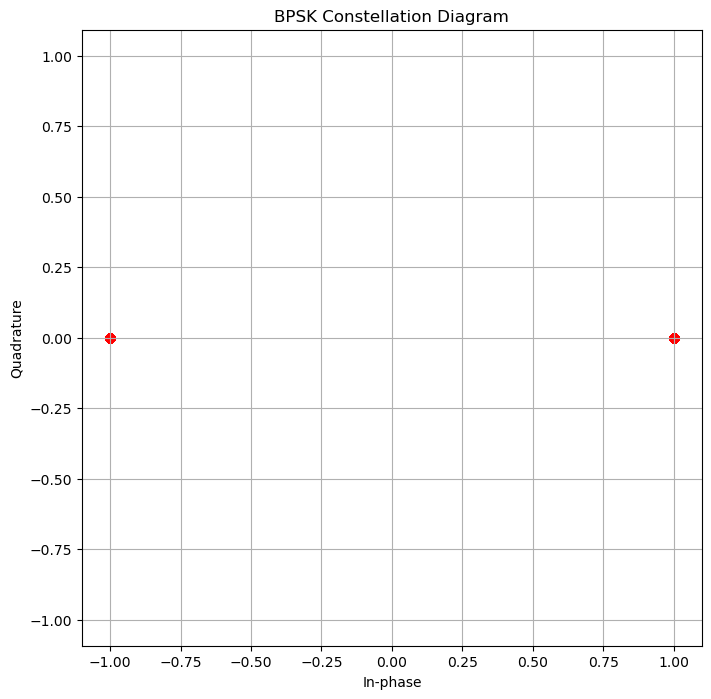


BPSK - First 10 symbols: [-1 -1 -1  1  1 -1  1  1 -1 -1]


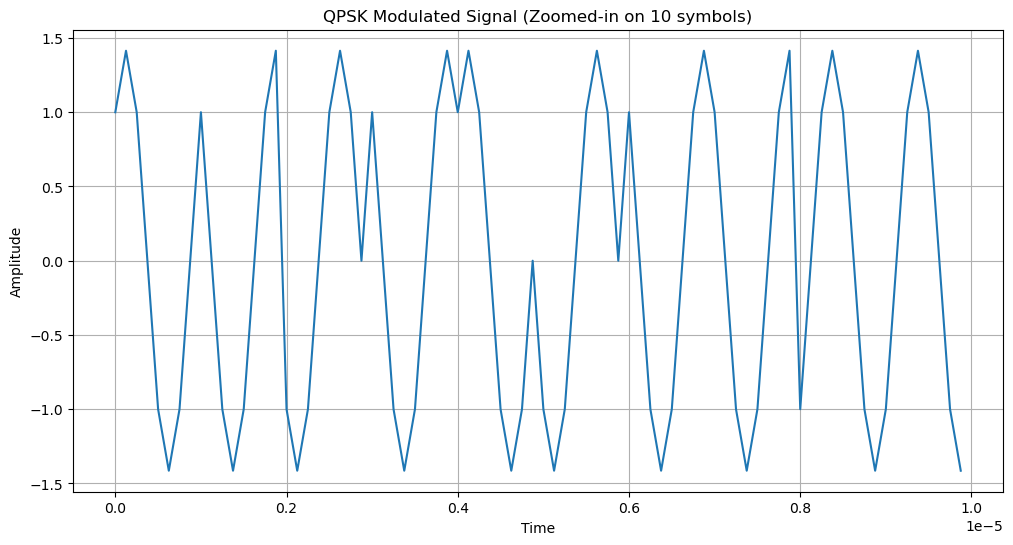

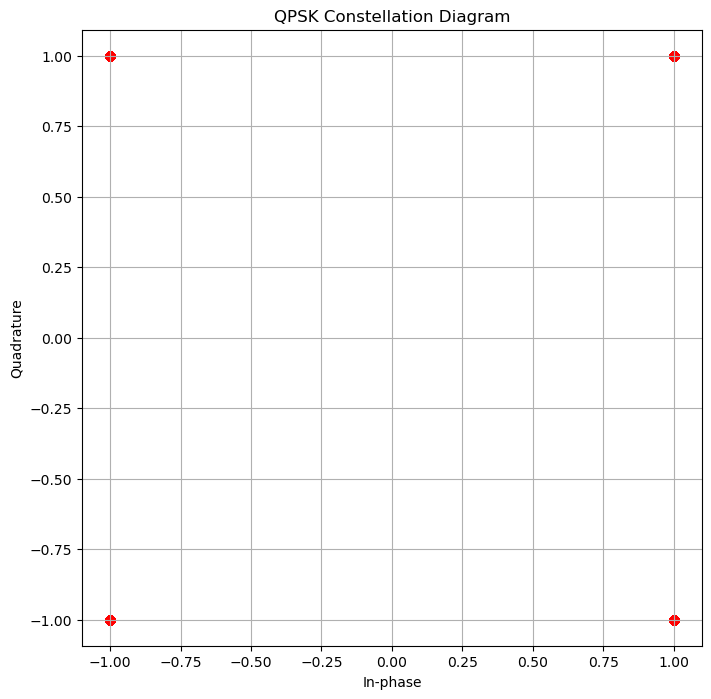


QPSK - First 10 symbols: [ 1.-1.j  1.+1.j -1.+1.j  1.+1.j  1.-1.j -1.+1.j  1.+1.j  1.+1.j -1.-1.j
 -1.-1.j]


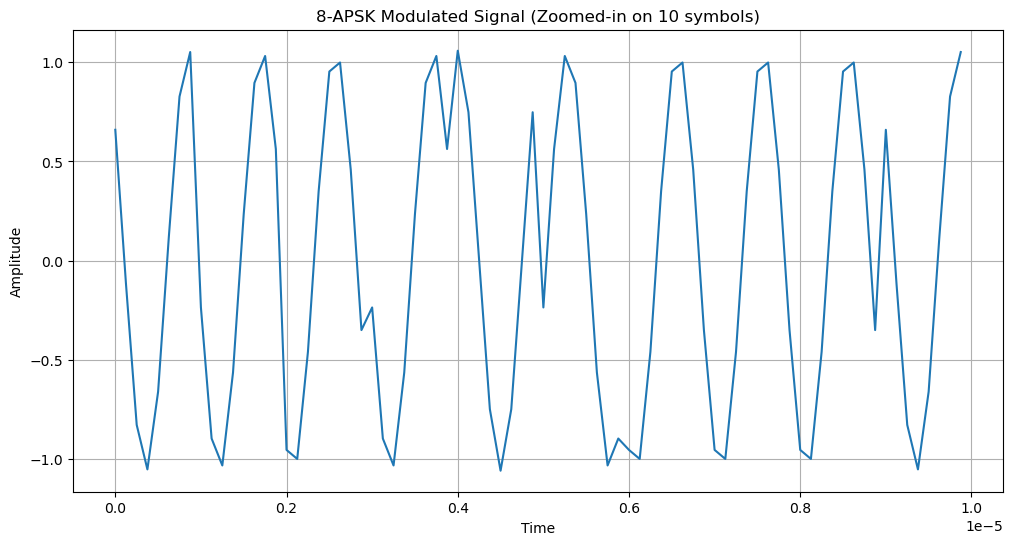

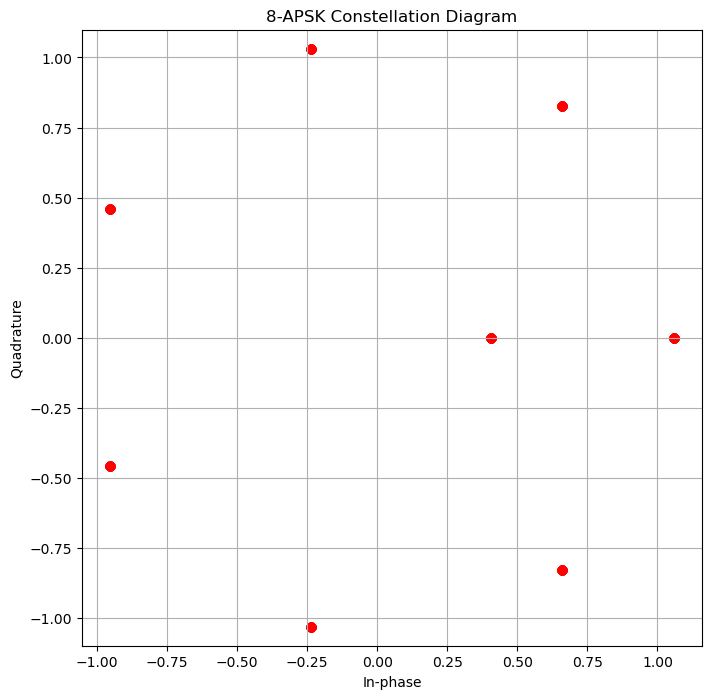


8-APSK - First 10 symbols: [ 0.65960545+0.82711907j -0.23541046+1.03140061j -0.95315749+0.45901645j
 -0.23541046+1.03140061j  1.057925  +0.j         -0.23541046-1.03140061j
 -0.95315749+0.45901645j -0.95315749+0.45901645j -0.95315749+0.45901645j
  0.65960545+0.82711907j]


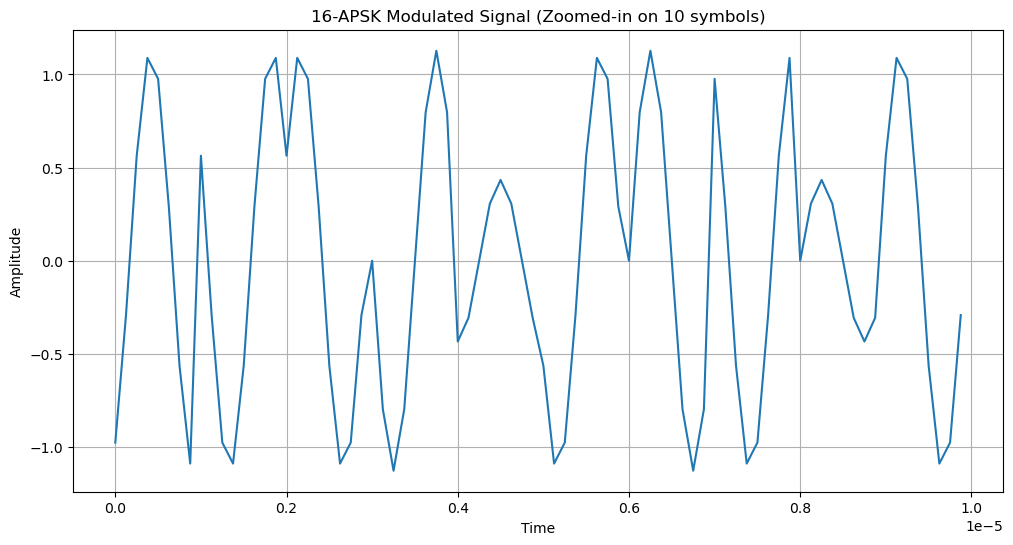

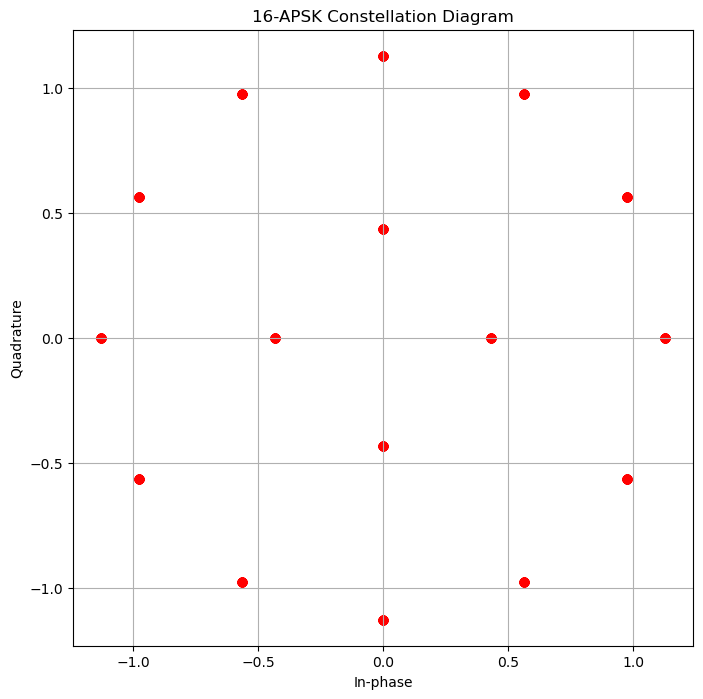


16-APSK - First 10 symbols: [-9.76221040e-01-5.63621480e-01j  5.63621480e-01+9.76221040e-01j
  5.63621480e-01-9.76221040e-01j  6.90237242e-17+1.12724296e+00j
 -4.33554985e-01+5.30951724e-17j -5.63621480e-01+9.76221040e-01j
 -2.07071172e-16-1.12724296e+00j  9.76221040e-01+5.63621480e-01j
 -7.96427587e-17-4.33554985e-01j  5.63621480e-01-9.76221040e-01j]


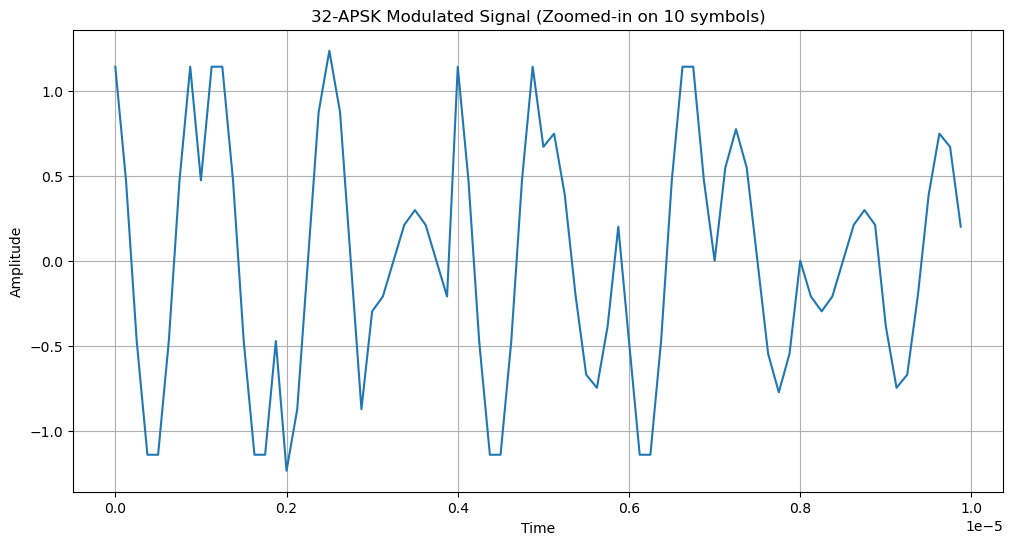

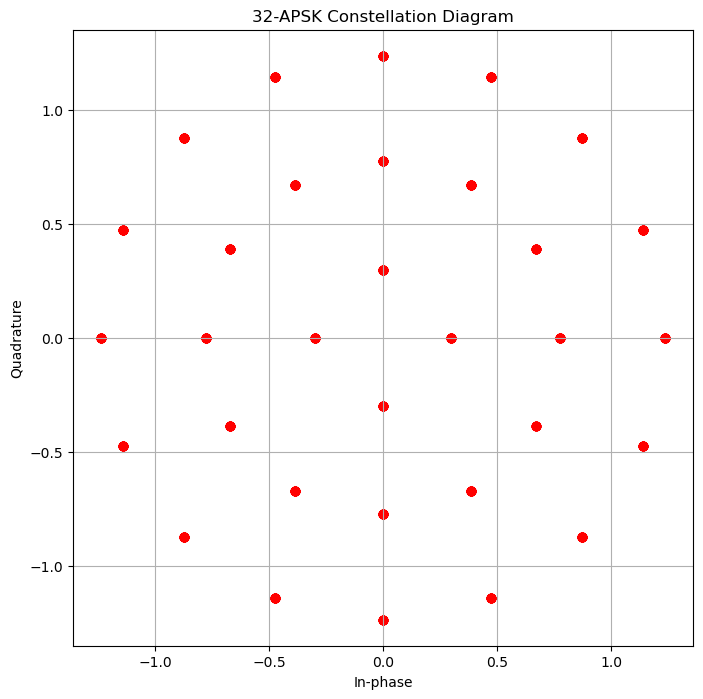


32-APSK - First 10 symbols: [ 1.14202971e+00+4.73044193e-01j  4.73044193e-01-1.14202971e+00j
 -1.23612405e+00+1.51381536e-16j -2.97861216e-01+3.64774785e-17j
  1.14202971e+00+4.73044193e-01j  6.70683988e-01-3.87219581e-01j
 -4.73044193e-01+1.14202971e+00j -1.42262166e-16-7.74439162e-01j
  1.82387393e-17+2.97861216e-01j -3.87219581e-01+6.70683988e-01j]


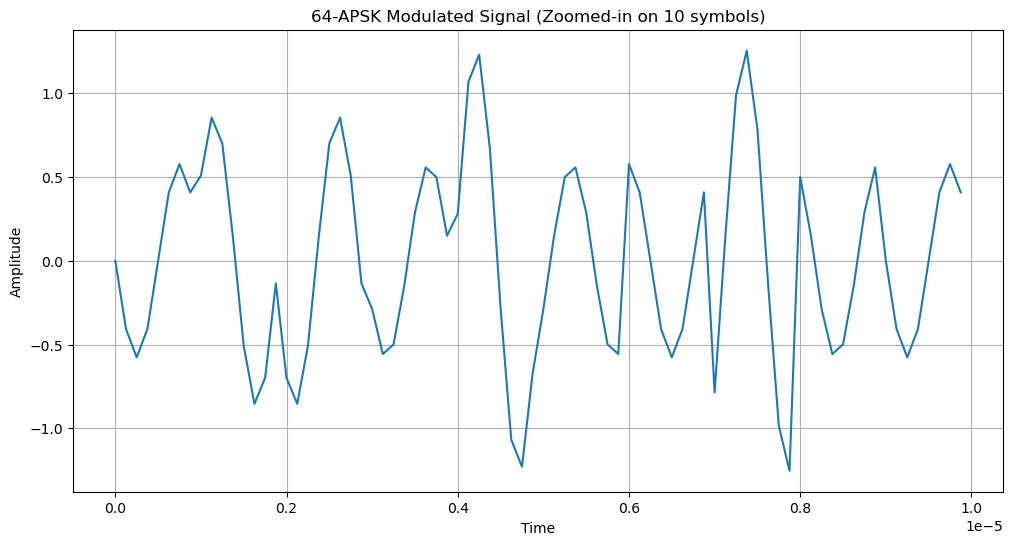

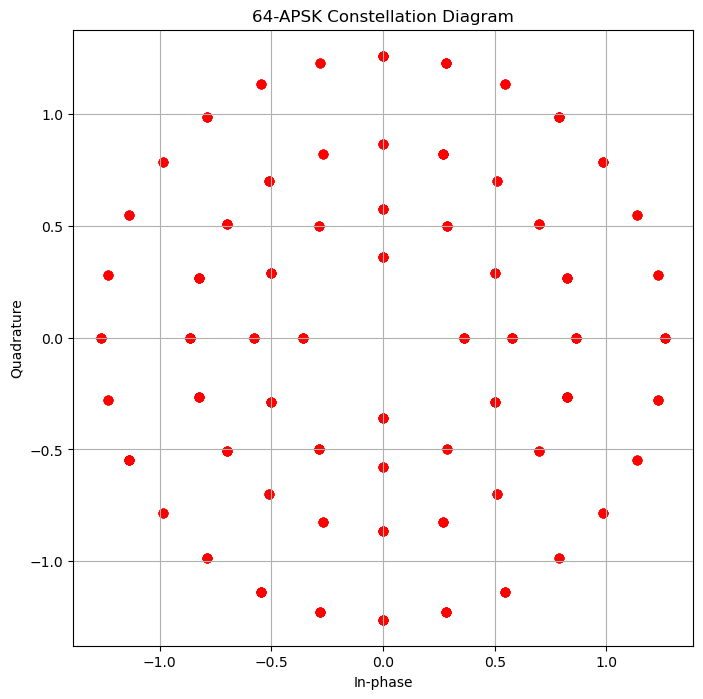


64-APSK - First 10 symbols: [ 3.53022679e-17+0.57652979j  5.08313559e-01-0.69963359j
 -6.99633592e-01+0.50831356j -2.88264893e-01+0.49928944j
  2.80634258e-01-1.22953902j -2.88264893e-01-0.49928944j
  5.76529786e-01+0.j         -7.86319717e-01-0.98601374j
  4.99289441e-01+0.28826489j  3.53022679e-17+0.57652979j]


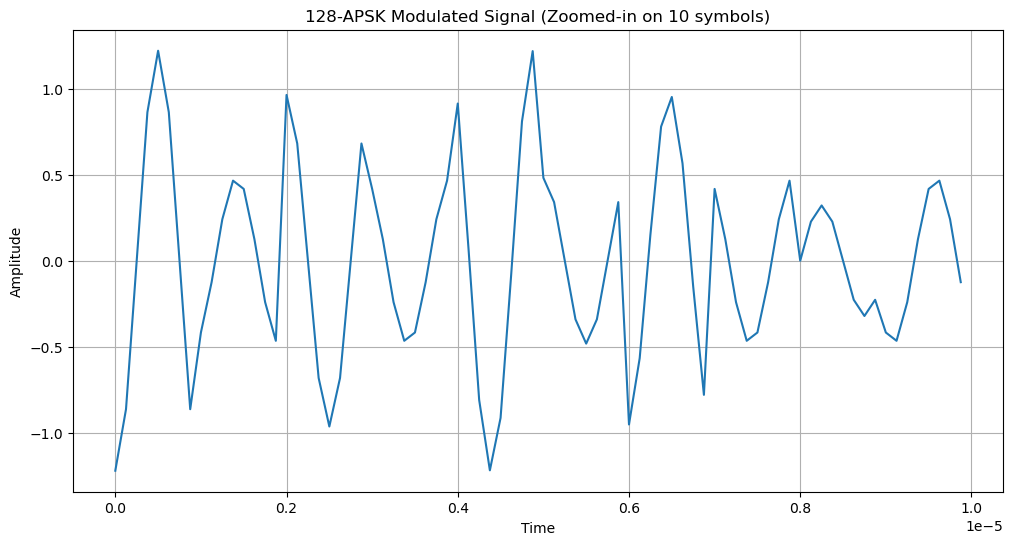

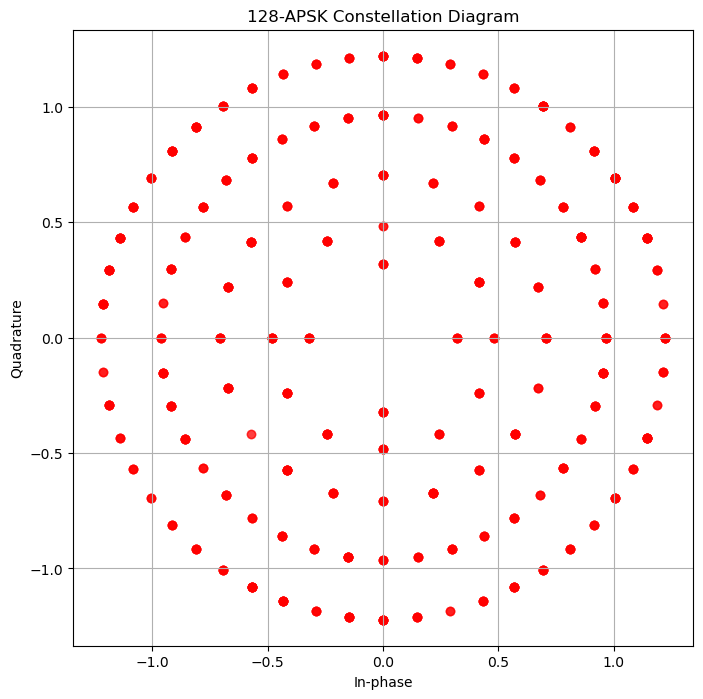


128-APSK - First 10 symbols: [-1.22154373e+00-3.92878428e-16j -4.17587330e-01-2.41094157e-01j
  9.64376629e-01+0.00000000e+00j  4.17587330e-01+2.41094157e-01j
  9.14338611e-01+8.10033325e-01j  4.82188314e-01+0.00000000e+00j
 -9.52503552e-01-1.50861742e-01j  4.17587330e-01+2.41094157e-01j
 -5.90510376e-17-3.21458876e-01j -4.17587330e-01+2.41094157e-01j]


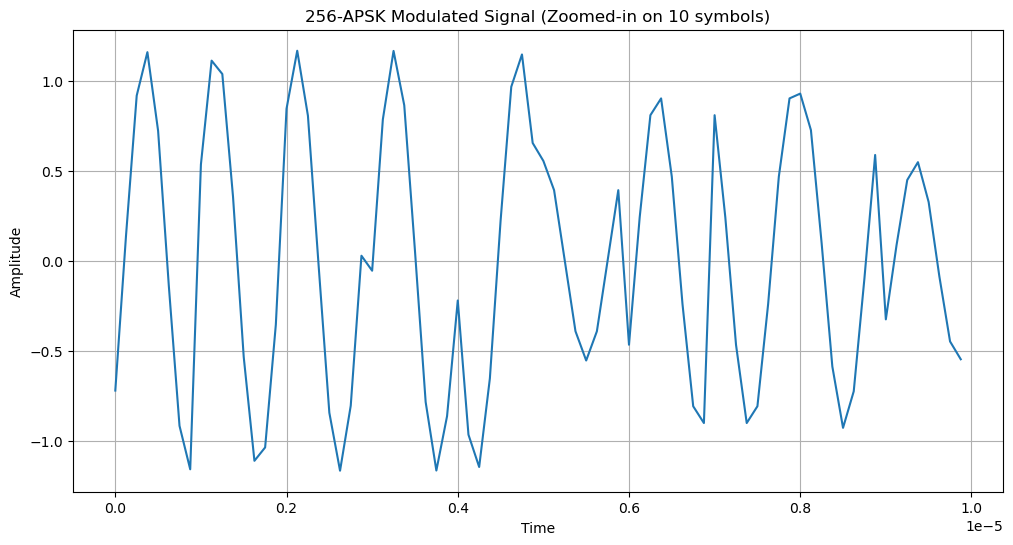

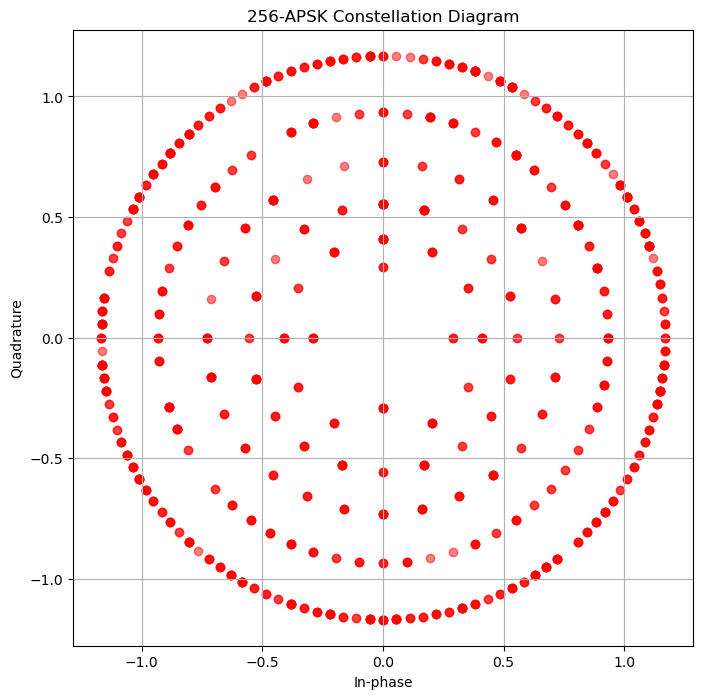


256-APSK - First 10 symbols: [-0.7221684 -0.91831182j  0.53532622-1.038388j    0.84550716-0.80618945j
 -0.05558789-1.1669335j  -0.22109404+1.14714481j  0.55492195+0.j
 -0.46730269-0.80939201j  0.80939201+0.46730269j  0.92948552-0.09769286j
 -0.32617494-0.44894129j]


In [31]:
dvbs2x = DVBS2X(num_symbols=1000, samples_per_symbol=8, carrier_freq=1e6)

modulation_schemes = [
    ('BPSK', dvbs2x.generate_bpsk),
    ('QPSK', dvbs2x.generate_qpsk),
    ('8-APSK', dvbs2x.generate_8apsk),
    ('16-APSK', dvbs2x.generate_16apsk),
    ('32-APSK', dvbs2x.generate_32apsk),
    ('64-APSK', dvbs2x.generate_64apsk),
    ('128-APSK', dvbs2x.generate_128apsk),
    ('256-APSK', dvbs2x.generate_256apsk)
]

for name, func in modulation_schemes:
    (t, signal), symbols, bits = func()
    dvbs2x.plot_signal(t, signal, name)
    dvbs2x.plot_constellation(symbols, name)
    print(f"\n{name} - First 10 symbols:", symbols[:10])